In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

matplotlib.style.use('ggplot')

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

%matplotlib inline

In [2]:
# データ読み込み
kg = pd.read_csv("kaggle_housing_price.csv")

In [3]:
# データを最初の5行だけ表示
kg.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
# 今回の解析では下記の列を使用することとします
target_col = 'SalePrice'
feature_cols = ['OverallQual', 'GrLivArea', '2ndFlrSF', 'BsmtFinSF1', 'OverallCond']

In [5]:
# target_colとfeature_colsをarrayにして、それぞれをY、Xとする
Y= np.array(kg[target_col])
X = np.array(kg[feature_cols])

In [6]:
#ホールドアウト法

# DataをTrain　: Test = 7　:　3に分ける
X_train,X_test,y_train,y_test = train_test_split(X,Y,train_size=0.7,test_size=0.3)

In [7]:
# Trainをさらに 7:3 に分ける
X_train1,X_train2,y_train1,y_train2 = train_test_split(X_train,y_train,train_size=0.7,test_size=0.3)

In [8]:
# 回帰分析を実施し、検証用データMSEを算出
lr = LinearRegression()
lr.fit(X_train1,y_train1)
y_pred=lr.predict(X_train2)
result=mean_squared_error(y_train2,y_pred)
print(result)

1613020540.5562544


In [9]:
#決定木を実行し、検証用データでMSEを算出
dtr=DecisionTreeRegressor()
dtr.fit(X_train1,y_train1)
y_pred2=dtr.predict(X_train2)
result2=mean_squared_error(y_train2,y_pred2)
print(result2)

1918377477.228013


In [10]:
# ランダムフォレストを実行し、検証用データでMSEを算出
rfr=RandomForestRegressor()
rfr.fit(X_train1,y_train1)
y_pred3=rfr.predict(X_train2)
result3=mean_squared_error(y_train2,y_pred2)
print(result3)

1918377477.228013


/Users/ooyamatsubasa/anaconda3/envs/python37/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [11]:
# Test dataを用いてMSEを算出し、予測精度を確認
rfr=RandomForestRegressor()
rfr.fit(X_train,y_train)
y_pred4=rfr.predict(X_test)
result4=mean_squared_error(y_test,y_pred4)
print(result4)

1923802619.203927


/Users/ooyamatsubasa/anaconda3/envs/python37/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


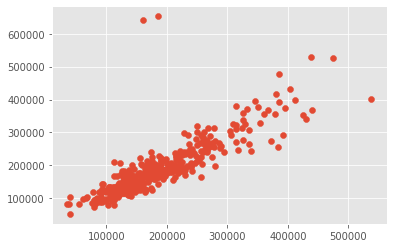

In [12]:
# 横軸：実際の成約価格、縦軸：予測した成約価格で散布図を作成し予測の誤差を確認
plt.scatter(y_test,y_pred4)

(array([  1.,   1.,   0.,   0.,   2.,   1.,   2.,  21., 213., 197.]),
 array([-3.01337562, -2.67629587, -2.33921612, -2.00213638, -1.66505662,
        -1.32797687, -0.99089713, -0.65381738, -0.31673763,  0.02034212,
         0.35742188]),
 <a list of 10 Patch objects>)

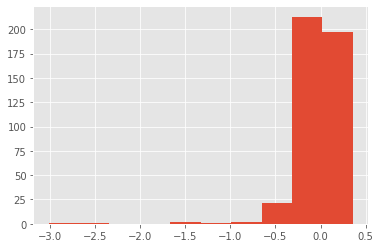

In [13]:
# 実際の成約価格と予測価格の誤差率をヒストグラムで表示
error = (y_test - y_pred4) / y_test
plt.hist(error)